# Solutions

Below are the solutions belonging to the course material of [Experimentation I](https://jeshuat.github.io/Experimentation1)




# Chapter 1 - Getting Ready



## OpenSesame, Anaconda and using this website

## Python exercises: Getting Ready



### Exercise 3. Printing "Hello world!"



In [ ]:
print('Hello world!')

Hello world!


### Exercise 4. Incrementing value of numeric variable

In [ ]:
myvar = 43
myvar = myvar + 1
print(myvar)

### Exercise 5. Inline scripts in OpenSesame

Values 44 and 45 were printed in the console. This was the case because myvar we defined as equal to 43 in the beginning of the experiment was then increased by 1 each time the inline was run in the experiment (once in the Practice loop, second time in the Experimental loop).








### Exercise 6. Inline scripts in OpenSesame using experimental variables

Added var. in front of every myvar:


In [ ]:
var.myvar = 43

In [ ]:
var.myvar = var.myvar + 1
print(var.myvar)


# Chapter 2 - Variables




## Python Exercises: Variables



### Exercise 1. Print welcome text



In [ ]:
name = input("Enter your name: ")
print("Hello " + name)

Enter your name: teacher
Hello teacher


### Exercise 2. Compute gross pay

In [ ]:
hours = float(input("Enter Hours: "))
rate = float(input("Enter Rate: "))
print("Pay: " + str(hours*rate))

# OR

hours = input("Enter Hours: ")
rate = input("Enter Rate: ")
pay = float(hours) * float(rate)
print("Pay: ", pay)

Enter Hours: 5
Enter Rate: 5
Pay: 25.0
Enter Hours: 5
Enter Rate: 5
Pay:  25.0


### Exercise 3. Numeric calculations

In [ ]:
width = 17
height = 12.0
print(width//2)
print(type(width//2))
print(width/2.0)
print(type(width/2.0))
print(height/3)
print(type(height/3))
print(1 + 2 * 5)
print(type(1 + 2 * 5))

8
<class 'int'>
8.5
<class 'float'>
4.0
<class 'float'>
11
<class 'int'>


### Exercise 4. Convert temperature

In [ ]:
celsius = float(input("Enter temperature in Celsius: "))
print("Temperature in Fahrenheit: " + str((celsius * 9/5) + 32))

Enter temperature in Celsius: 30
Temperature in Fahrenheit: 86.0


### Exercise 5. Convert reaction time

In [ ]:
import math
RT = int(input("Enter reaction time value in ms (between 1 and 2000 ms): "))
RTinv = round(-1000 / RT,2)
RTlog = round(math.log(RT),2)
print("Inverse RT is: " + str(RTinv) + "; Log RT is: " + str(RTlog) + ".")

### Exercise 6. Combine reaction time and accuracy information

In [ ]:
RT = int(input("Enter average reaction time value in ms (between 1 and 2000 ms): "))
ACC = float(input("Enter average accuracy score as proportion (between 0 and 1): "))
IES = round(RT/ACC)
PEp = round((1-ACC)*100,2)
print("When combining an RT of " + str(RT) + " ms and an ACC of " + str(ACC) + " (= " +  str(PEp) + "% errors), the IES score is " + str(IES) + " ms.")

Enter average reaction time value in ms (between 1 and 2000 ms): 45
Enter average accuracy score as proportion (between 0 and 1): 0.5
When combining an RT of 45 ms and an ACC of 0.5 (= 50.0% errors), the IES score is 90 ms.


## Gaze cuing task in OpenSesame

Tutorial solution: [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/02_variables/TutorialGazecuing.osexp)



### Exercise 1. Express the location of the cues in relative terms

1. Change all -300 and 300 values in the block loop to -0.1 and 0.1. These indicate the % values which will be used next to calculate the new x-coordinates.
2. Add an inline script above the target sketchpad with the content:


In [ ]:
# student from WG 101
# var.width stores width of the screen set in the experiment
# Calculate new positions by calculating the proportion of this width
var.target_pos = float(var.target_pos) * var.width
var.dist_pos = float(var.dist_pos) * var.width


3. And within the `target`  object, ensure you refer to each of these new positions using the squared-bracket notation (remains unchanged).

Note that one disadvantage of the solution above is that we OVERWRITE the original information in target_pos so this information is not logged anymore. If you want to keep the original information it is better to create a new variable (e.g. `target_pos2` and use the squared-bracket notation to refer to this variable instead). 





### Exercise 2. Calculate average performance

We want to present proportion of accurate, incorrect and missing responses to the participants in the feedback object. 

For this, first, we would like to count the number of missing trials to calculate the proportion of missed responses. 

We add a `var_init` python inline object right before the block_loop to initialize the value for the variable `var.missing`. Setting this variable outide the block loop avoids resetting it to 0 each time the loop runs. 


In [ ]:
var.missing = 0

We then want to update this value if participants did not respond on a given trial. Otherwise, the value remains unchanged.
1. We add a new python inline object `checkMissing` inside the trial_sequence below the `incorrect_sound`. And we make sure that this python inline runs only when the [response] = "None".
2. Calculate the proportion of missing trials compared to all trials seen so far. We do this in a new python inline `calculate_rates` we add before the `feedback` object.
3. Calculate the current error rate, Error = 1 - (Accurate + Missing).


In [ ]:
## checkMissing inline should contain the following:
var.missing = var.missing + 1 # one more missing trial

In [ ]:
## calculate_rates inline should contain the following:
var.missing_rate = (var.missing/(var.count_trial_sequence + 1)*100)
# notice that we needed to add 1 to the count of trials. This is because the OpenSesame counts trials starting at 0.

var.err_rate = 100 - (var.missing_rate + var.acc)



5. At the end of each block, the feedback item displays the final proportions of correct, incorrect and missed trials. The structure of the experiment and the feedback item are shown below. 

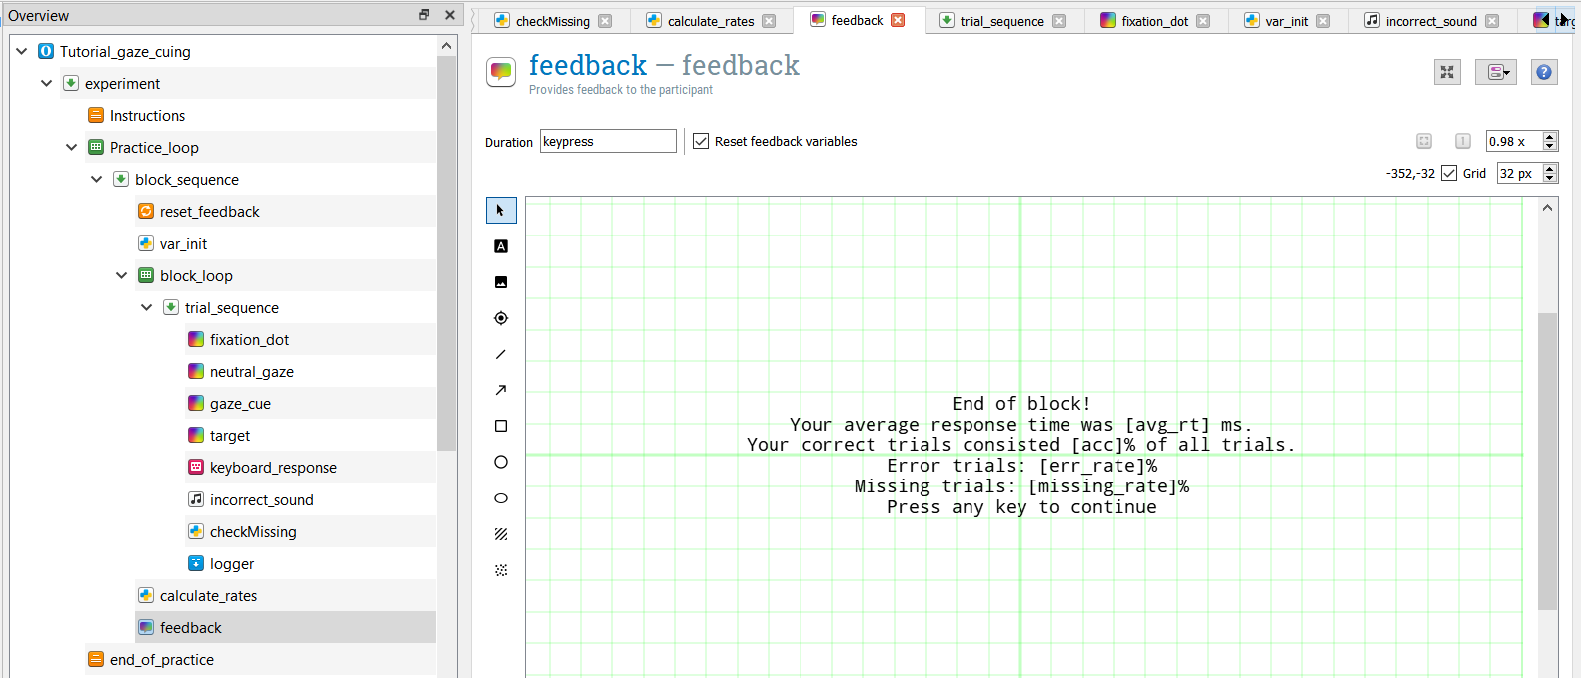

# Chapter 3 - Conditionals



## Python exercises: Conditionals



### Exercise 1. Advanced pay computation (1)
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch03)




### Exercise 2. Advanced pay computation (2)


In [ ]:
je hours = input('Enter Hours: ')
rate = input('Enter Rate: ')
try:
  if float(hours) > 40:
    extra_rate = float(rate)*1.5
    normal_hours = 40
  else:
    extra_rate = 0
    normal_hours = float(hours)
  pay = normal_hours*float(rate) + ((float(hours) - 40)*extra_rate)
  print('Pay: ', pay)
except:
  print('Error, please enter numeric input')

Enter Hours: 30
Enter Rate: 10
Pay:  300.0


Alternatively, substituting using raise to quit the script:

In [ ]:
try:
    hours = int(input("Enter hours: "))
    rate = float(input("Enter rate: "))
except:
    print("Error, please enter numeric input!")
    raise

if hours > 40:
    pay = (hours - 40)*rate*1.5 + 40 * rate
else:
    pay = hours * rate

print("Pay: ", pay)

ADVANCED:
If you want to quit the script after an except without an error function you will need to import the sys module:

In [ ]:
import sys

try:
    hours = int(input("Enter hours: "))
    rate = float(input("Enter rate: "))
except:
    print("Error, please enter numeric input!")
    sys.exit(1)

if hours > 40:
    pay = (hours - 40)*rate*1.5 + 40 * rate
else:
    pay = hours * rate

print("Pay: ", pay)

### Exercise 3. Convert scores to grades


In [ ]:
score = input('Enter your score (between 0.0 and 1.0): ')
try:
  if float(score) > 1 or float(score) < 0:
    print('Bad score')
  elif float(score) >= 0.9:
    print('A')
  elif float(score) >= 0.8:
    print('B')
  elif float(score) >= 0.7:
    print('C')
  elif float(score) >= 0.6:
    print('D')
  else:
    print('F')
except:
  print('Bad score')

Alternatively, using raise:

In [ ]:
try:
    grade = float(input("Enter score: "))
except:
    print("Bad score")
    raise

if grade < 0 or grade > 1.0:
    print("Score is out of range!")
elif grade >= 0.9:
    print("A")
elif grade >= 0.8:
    print("B")
elif grade >= 0.7:
    print("C")
elif grade >= 0.6:
    print("D")
else:
    print("F")

Or again using sys.exit(): 

In [ ]:
import sys

try:
    grade = float(input("Enter score: "))
except:
    print("Bad score")
    sys.exit(1)

if grade < 0 or grade > 1.0:
    print("Score is out of range!")
elif grade >= 0.9:
    print("A")
elif grade >= 0.8:
    print("B")
elif grade >= 0.7:
    print("C")
elif grade >= 0.6:
    print("D")
else:
    print("F")

### Exercise 4. Check the age of your participant

In [ ]:
name = input('Your name: ')
age = input('Your age in years: ')
try:
  if float(age) < 18:
    print('Wow you are too young!')
  elif float(age) > 30:
    print('Wow you are too old!')
  else:
    print('Hello', name, ', welcome to this experiment!')
except:
  print('Invalid input, try again!')


## Stroop, flanker, and go-nogo tasks in OpenSesame

Solution tutorial Stroop task: [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Strooptask.osexp)

Solution tutorial flanker task: [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/flankertask_1.osexp)

Solution tutorial go-nogo task: [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/SmokingGoNoGo.osexp)





### Excercise 1. Reuse trial sequence in the flanker task

Solution [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/flankertask_1_exercise1.osexp)



### Excercise 2. Change the number of trials in the flanker task

1600 observations per level of congruency / 10 participants = 160 trials. 160 trials divided over 4 test blocks = 40 trials per block per level of congruency. So we need a total of 80 trials per block = 20 (instead of 25) cycles in `block_loop_1`.



### Excercise 3. Stop practice block when performance is sufficient

Solution [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/flankertask_1_exercise3.osexp)

Overview of main changes:
![picture](https://raw.githubusercontent.com/JeshuaT/Experimentation1/fe1c5c89bf8b7748233594b6032116afca23756e/content/solutions/solution_flanker_exercise3.png)


### Excercise 4. Calculate average correct reaction time

add inline script after object that registers response


In [ ]:
if var.correct == 1:
  var.correctrtcnt = var.correctrtcnt + var.response_time
if var.correct == 0:
  var.errorrtcnt = var.errorrtcnt + var.response_time

var.meanrt_corr = var.correctrtcnt / var.trial_counter
var.meanrt_err = var.errorrtcnt / var.trial_counter
 

add a feedback display after this script that displays meanrt_corr, meanrt_err and avg_rt using the squared brackets


### Excercise 5. Counterbalancing: Even or odd participant numbers

Adapt the correct responses in the correct position in the triallist using the values: [corresp_red] [corresp_green] [corresp_blue] and [corresp_yellow]  

e.g. [corresp_red] replaces all values "r", etc.

also refer to these four variables with squared bracket notation in the instruction.

Then, somewhere before you present the trials (e.g. beginning of the experiment) add the following inline script:

In [ ]:
# EITHER method 1
if var.subject_parity == "odd":
  var.version = "version 1"
  var.corresp_red = "1"
  var.corresp_green = "2"
  var.corresp_blue = "3"
  var.corresp_yellow = "4"
else:
  var.version = "version 2"
  var.corresp_red = "3"
  var.corresp_green = "4"
  var.corresp_blue = "1"
  var.corresp_yellow = "2"

# OR method 2, only the first line needs to change:
if var.subject_nr % 2 == 1:
  var.version = "version 1"
  var.corresp_red = "1"
  var.corresp_green = "2"
  var.corresp_blue = "3"
  var.corresp_yellow = "4"
else:
  var.version = "version 2"
  var.corresp_red = "3"
  var.corresp_green = "4"
  var.corresp_blue = "1"
  var.corresp_yellow = "2"




# Chapter 4 - Functions



## Python exercises: Functions



### Exercise 1. Sequence of function calls

Correct answer: D

### Exercise 2. Pay computation with a function
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch04)



### Exercise 3. Grade calculation using a function
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch04)

### Exercise 4. Check age of your participant



In [ ]:
def check_age(age, name):
  if age < 18:
    return "You are too young for this experiment."
  elif age > 30:
    return "You are too old for this experiment."
  else:
    return f"Hello {name}, welcome to this experiment."

name = input("Please enter your name: ")
age = int(input("Please enter your age: "))
message = check_age(age, name)
print(message)

## The Wiconsin Card Sorting Task in OpenSesame

You can download the full experiment, including the solutions to the extra assignments, here:

https://osf.io/f5er2/



## The Ultimatum Game in OpenSesame

A solution can be downloaded by clicking [this link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/04_functions/ultimatumgame/TheUltimatumGame.osexp)


# Chapter 5 - Loops



## Python exercises: Loops



### Exercise 1. Print total, count, and average
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch05) without the try..except structure

### Exercise 2. Print total, count, and average and check incorrect inputs
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch05)

In [ ]:
count = 0
total = 0

while True:
    str_val = input("Enter a number:")
    if str_val == 'done':
        break
    try:
        val = float(str_val)
    except:
        print("Invalid input")
        continue
    total = total + val
    count = count + 1

print(total, count, total/count)

Enter a number:56


KeyboardInterrupt: ignored

### Exercise 3. Print maximum and minimum
solution can be found [here](https://github.com/aksonai/py4e/tree/master/ch05)



### Exercise 4. Print moving text

In [ ]:
fill = ""
import time
for i in range(1,41):
    fill = fill + " "
    print("\r",fill + 'Hello world',end='')
    time.sleep(0.5)

                                         Hello world

### Exercise 5. Print a Christmas tree


In [ ]:
def print_tree(height):
    # Loop through the rows of the tree
    for row in range(height):
        # Print spaces before the asterisks to center the tree
        for space in range(height-row-1):
            print(" ", end="")
        
        # Print the asterisks for the current row
        for asterisk in range(row*2+1):
            print("*", end="")
        
        # Move to the next row
        print()

# Test the function with different values for the height
print_tree(5)
print_tree(7)
print_tree(10)

## The Cyberball game in OpenSesame

Solution to the first part of the tutorial can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05.osexp)

Solution to the second part of the tutorial (with the custom code) can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2-rev1.osexp) 



### Exercise 1. Fixing the issue of incorrect number of trials
There are multiple throws in one trial! So there are likely more than 60 throws presented in this experiment. If you set the number of trials to 1 you see that this trial first let player 1 throw the ball, and after that 2 or 3 throws the ball in the same trial. This happens because each for each player_loop it is checked, independently of each other (!), whether current_player equals the values 1, 2, and 3 respectively. Because player_loop2 and player_loop3 will be run after player_loop1, the first trial will already present two throws (1>2 then 2>3, or 1>3 then 3>2) or even three or more throws (e.g. 1>2, then 2>1, then 1>2 or 3 etc.). 

The full solution for this step can be downloaded [here] (https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise1-rev1.osexp) 

### Exercise 2. Present video at the center of the screen

The full solution for this step can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise2-rev1.osexp) 

`play_movie` inline is changed to include the following:

In [ ]:
import cv2
import numpy
import pygame
# Full path to the video file in file pool
          
path = pool[var.movie_filename]
# Open the video
video = cv2.VideoCapture(path)
# A loop to play the video file. This can also be a while loop until a key
# is pressed. etc.
videowidth = video.get(cv2.CAP_PROP_FRAME_WIDTH)
videoheight = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
          
for i in range(100):
    # Get a frame
    try:
        retval, frame = video.read()
        # Rotate it, because for some reason it otherwise appears flipped.
        frame = numpy.rot90(frame)
        # Flip it (vertically?!), because for some reason it otherwise appears horizontally (!) flipped.
        frame = numpy.flipud(frame)
        # The video uses BGR colors and PyGame needs RGB

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Create a PyGame surface
        surf = pygame.surfarray.make_surface(frame)
    except:
        #end of movie
        break

    # Show the PyGame surface!
    exp.surface.blit(surf, ((var.width - videowidth) / 2, (var.height - videoheight) / 2))
    pygame.display.flip()

### Exercise 3. Change the speed of the video

The full solution for this step can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise3-rev1.osexp) 

In the Run tab of the `play_movie`:

In [ ]:
import cv2
import numpy
import pygame
# Full path to the video file in file pool
          
path = pool[var.movie_filename]
# Open the video
video = cv2.VideoCapture(path)
# A loop to play the video file. This can also be a while loop until a key
# is pressed. etc.
videowidth = video.get(cv2.CAP_PROP_FRAME_WIDTH)
videoheight = video.get(cv2.CAP_PROP_FRAME_HEIGHT)

fps =  video.get(cv2.CAP_PROP_FPS)
print(fps)

for i in range(100):
    # Get a frame
    try:
        retval, frame = video.read()
        # Rotate it, because for some reason it otherwise appears flipped.
        frame = numpy.rot90(frame)
        # Flip it (vertically?!), because for some reason it otherwise appears horizontally (!) flipped.
        frame = numpy.flipud(frame)
        # The video uses BGR colors and PyGame needs RGB

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Create a PyGame surface
        surf = pygame.surfarray.make_surface(frame)
    except:
        #end of movie
        break

    # Show the PyGame surface!
    exp.surface.blit(surf, ((var.width - videowidth) / 2, (var.height - videoheight) / 2))
    pygame.display.flip()
    # clock.sleep(1000/fps)
    myclocktick(fps)

In the Prepare tab of the `play_movie`:

In [ ]:
def myclocktick(foo):
  #inspired by clock.tick
  #see https://stackoverflow.com/questions/34383559/pygame-clock-tick-vs-framerate-in-game-main-loop
  if var.has(u'prevt'):
        diff = ((1000/foo) - (clock.time() - var.prevt) ) - 10
        if diff>0:
            clock.sleep(diff)

  var.prevt = clock.time()

### Exercise 4. Manipulate the level of social exclusion

The full solution for this step can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise4-rev1.osexp) 

### Exercise 5. Alternatives to manually prepare an OpenSesame object

The full solution for the step 1 can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise5a-rev1.osexp) 

The full solution for the step 2 can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Cyberball_loops05_2_Exercise5b-rev1.osexp) 


# Chapter 6 - Strings



## Python exercises: Strings


### Exercise 1. Extract substring


In [ ]:
text1 = "X-DSPAM-Confidence:0.8475"
col_index = text1.find(":")
num = float(text1[col_index+1:])
print(num)
print(type(num))

### Exercise 2. Understanding string methods



We provide 3 solutions that handle the reduction of whitespaces between words differently


In [ ]:
text2 = "  This is a  setece      with  a typo and   too many  spaces "

text2 = text2.strip()
text2 = text2.replace("setece", "sentence")

while "  " in text2:
  text2 = text2.replace("  ", " ")

print(text2)

This is a sentence with a typo and too many spaces


In [ ]:
string = "  This is a  setece      with  a typo and   too many  spaces "
string = string.strip()
string = string.replace('setece', 'sentence')
string = string.replace('   ', ' ') # first reduce 3 whitespaces to 2
string = string.replace('  ', ' ') # second reduce 2 whitespaces to 1

print(string)

This is a sentence with a typo and too many spaces


In [ ]:
string = "  This is a  setece      with  a typo and   too many  spaces "

string = string.strip()
string = string.replace('setece', 'sentence')
string = ' '.join(string.split()) # split the string (removes spaces) and rejoin it (around 1 space)

print(string)

This is a sentence with a typo and too many spaces


In [ ]:
string = "  This is a  setece      with  a typo and   too many  spaces "
" ".join(string.split())

'This is a setece with a typo and too many spaces'


### Exercise 3. Create a looping text

In [ ]:
#s = "1234"
s = "Look at this moving text!!!!!!!!!!!!!!!!"

import time
for repeat in range(0,3):
  for i in range(0,len(s)):
      print('\r',s[i:len(s)]+s[0:i],end='')
      time.sleep(0.2)
      
#end with original
print('\r',s,end='')      
      

  moving text!!!!!!!!!!!!!!!!Look at this

KeyboardInterrupt: ignored

In [ ]:
import time

text = "Look at this moving text!!!!!!!!!!!!!!!!"
for repeat in range(3):

  for i in range(len(text)):
    # right to left
    print('\r', text[i:] + text[:i], end = '')
    # left to right
    print('\r', text[-i:] + text[:-i], end = '')
    
    time.sleep(.2)

 !!!!!!!!!!!!Look at this moving text!!!!

KeyboardInterrupt: ignored

## Memory Span Task in OpenSesame

Solution to the tutorial can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/WMSpan_Sequential_v2.osexp)






### Exercise 1. Abort the experiment when four trials in a row are incorrect


Step 1: Initialize two variables and set the break-if statement

In [ ]:
var.stop = 0 # abort the Conditions loop when the value is 1
incorrect = 0 # record the number of successive incorrect trials

  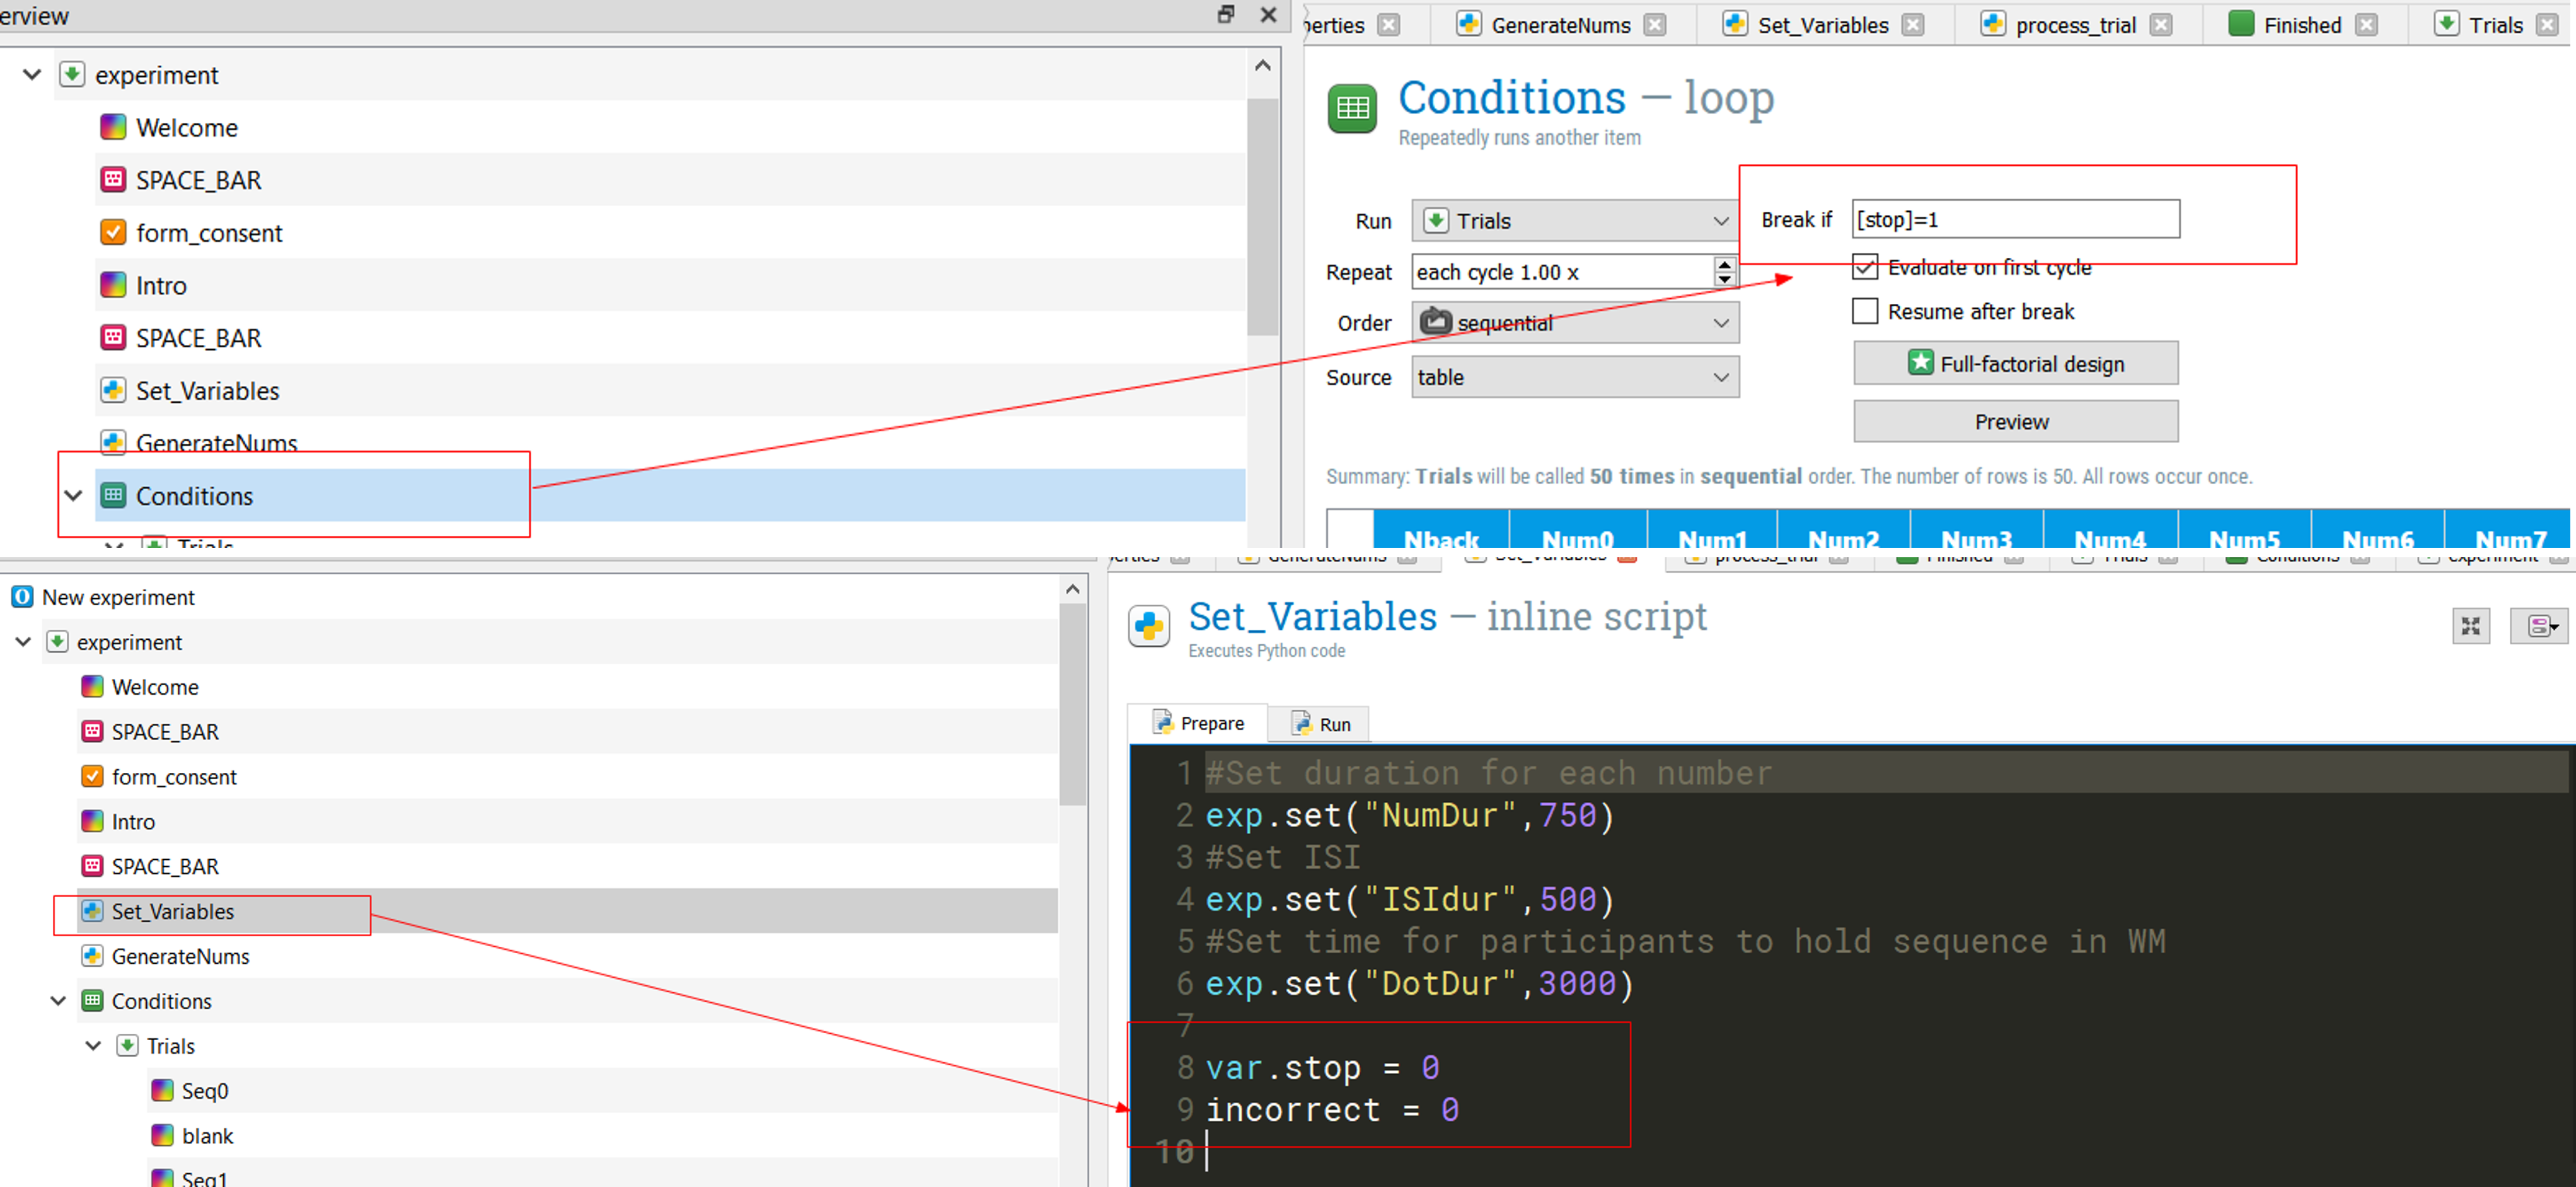

Step 2: Update variables based on the response of current trial 

In [ ]:
# insert these codes into inline_script item "process_trial"
if var.num_correct != var.num_total: 
    incorrect = incorrect + 1
    if incorrect == 4:
        var.stop = 1
else:
    incorrect = 0

Step 3: When var.stop has changed to 1, skip the following Sketchpad item “Next” and the Keyboard_response item SPACE_BAR” (Because there’s no next trial)

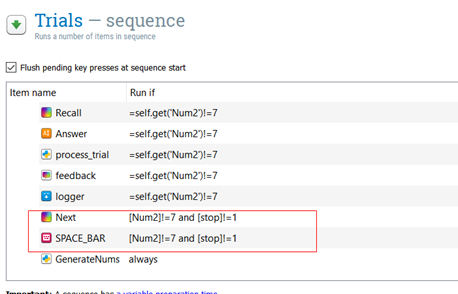


### Exercise 2. Recollect the sequence in reversed order


**Add and modify some codes in "process_trial": **





Step 1: Create a new variable “var.seq_reversed” to store the reversed sequence

In [ ]:
# (1) This can be achieved by iteratively adding each character in var.seq_presented into var.seq_reversed in reversed order
var.seq_reversed = ''
for i in range(1,len(var.seq_presented)+1):
    var.seq_reversed = var.seq_reversed + var.seq_presented[len(var.seq_presented)-i]


In [ ]:
# (2)	A much easier solution is to use negative slicing
var.seq_reversed = var.seq_presented[::-1]

Step 2: Modify the conditional and loop statements related to feedbacks

In [ ]:
if (var.response == var.seq_reversed): 
    var.fbtext = "Correct sequence"
else:
    var.fbtext = "Incorrect sequence"

In [ ]:
for i in range(len(var.response)):
    if var.response[i] == var.seq_reversed[i]: 
        var.num_correct = var.num_correct + 1



### Exercise 3. Ignore duplicates in the answer

The following code counts number of correct letters while ignoring duplicates. Note, when combining this with Exercise 2, you might have to use 'var.seq_reversed'.

In [ ]:
seq_check = var.seq_presented 
for char in var.response: 
    if (seq_check.find(char)) > -1: 
        var.num_correct = var.num_correct + 1
        seq_check = seq_check.replace(char,'') 


**Note**: If you generally wish to remove duplicates in a string while ensuring that letter order is preserved, you can use one of the following options. 
Also note that the `set` function is often used in Python to remove duplicates, but it does not preserve order.


In [ ]:
Option 1.

# code builds a new string t using unique letters within a string str. It does this in the order of letters found in str. 

str = "abdb"
t = "" # empty
for i in str: # for each letter in str
    if (i in t): # if the letter is already in t
        pass # do nothing
    else: # if the letter is not in t
        t = t + i # add that to t
    
print (t) # outputs abd

------------
Option 2.
 

from collections import OrderedDict
str = "pqrqtrq" 
x = "".join(OrderedDict.fromkeys(str))
print (x) # outputs pqrt


# Chapter 7 - Files



## Python exercises: Files


### Exercise 1. Print content of text file line by line

solutions can be found [here](https://github.com/aksonai/py4e/tree/master/ch07)



### Exercise 2. Parsing content of a text file
solutions can be found [here](https://github.com/aksonai/py4e/tree/master/ch07)



### Exercise 3. Add an Easter Egg



In [ ]:
filename = input("Enter the file name: ")
if filename == "na na boo boo":
    print("NA NA BOO BOO TO YOU - You have been punk'd!")

else:
  fhand = open(filename, 'r')

  count = 0
  total_confidence = 0
  for line in fhand:
      if line.startswith("X-DSPAM-Confidence:"):
          space_index = line.find(" ")
          my_num = float(line[space_index+1:])
          total_confidence += my_num
          count += 1

  print("Average spam confidence: ", total_confidence/count)

### Exercise 4. Read files until you are done

TODO


## Merging logfiles OpenSesame

### Step 3

Correct code:



In [ ]:
# Change this to the folder that contains the .csv files
SRC_FOLDER = './tutorial_data/data/'
fout = open('./tutorial_data/merged.csv', 'w')

filecount = 0
for basename in os.listdir(SRC_FOLDER):
    path = os.path.join(SRC_FOLDER, basename)
    print('Reading ',path)
    fhand = open(path)
    for line in fhand:
        fout.write(line)
    fhand.close()
    filecount = filecount + 1
print('Number of files considered for merge:',filecount)
fout.close()


### Exercise 1. Count number of files merged



In [ ]:
# Change this to the folder that contains the .csv files
SRC_FOLDER = './tutorial_data/data/'
fout = open('./tutorial_data/merged.csv', 'w')

filecount = 0
filecountmerged = 0
for basename in os.listdir(SRC_FOLDER):
    path = os.path.join(SRC_FOLDER, basename)
    if path !=  "./tutorial_data/data/CI_RSI2000_test.csv":
        print('Reading {}'.format(path))
        fhand = open(path)
        linecount = 0
        for line in fhand:
            if linecount == 0:
                if filecount == 0:
                    #header first file
                    refheader =  line
                    fout.write(line)
                    write_this_file = True
                else:
                    #check whether current header matches refheader
                    if line == refheader:
                        write_this_file = True
                        filecountmerged = filecountmerged + 1
                    else:
                        write_this_file = False
            else:
                if write_this_file:
                    fout.write(line)
            linecount = linecount + 1
        print('Line Count:', linecount)
        fhand.close()
        filecount = filecount + 1
fout.close()
print('Number of files considered for merge:',filecount,". Merged: ",filecountmerged)

### Exercise 2. Manually change content of a file

In [ ]:
fout = open('./tutorial_data/merged.csv', 'r')
fout_re = open('./tutorial_data/merged_re.csv', 'w')
for line in fout:
    line = line.replace("neutral","neu")
    fout_re.write(line)
fout.close()
fout_re.close()

### Exercise 3. Copy renamed files to another location

In [ ]:
for i in range(1,11):
    file_name1 = os.path.join('tutorial_data2', 'file_pp'+str(i)+'.txt')
    f_copy = open(file_name1,'w')
    
    file_name2 = os.path.join('tutorial_data2', str(i), 'file.txt')
    f_orig = open(file_name2,'r')
    
    for line in f_orig:
        f_copy.write(line)
    
    f_copy.close()
    f_orig.close()

### Exercise 4. Add information as a new column to a textfile

In [ ]:
for i in range(1,11):
    file_name = os.path.join('tutorial_data2', 'file_pp'+str(i)+'.txt')
    with open(file_name,'r') as f:
        content = f.readlines()
    
    with open(file_name,'w') as f:
        for line in content:
            f.write('file_pp'+str(i)+'\t'+line)
            

### Exercise 5. Merge the new text files to a single textfile

In [ ]:
fout = open(os.path.join('tutorial_data2','merged.txt'), 'w')
header = ['file name','column 2','column 3']
fout.write('\t'.join(header)+'\n')

for i in range(1,11):
    file_name = os.path.join('tutorial_data2', 'file_pp'+str(i)+'.txt')
    with open(file_name,'r') as f:
        content = f.read()
        fout.write(content)
fout.close()


# Chapter 8 - Lists


## Python exercises: Lists



### Exercise 1. Find all unique words in a file
solutions can be found [here](https://github.com/aksonai/py4e/tree/master/ch08)


### Exercise 2. Minimalist Email Client
solutions can be found [here](https://github.com/aksonai/py4e/tree/master/ch08)


### Exercise 3. Process list of numbers
solutions can be found [here](https://github.com/aksonai/py4e/tree/master/ch08)



### Exercise 4. Using tuples in the grade calculation


In [ ]:

def calc_grade(score):
  # define grades and scores tuples
  grades = ('A', 'B', 'C', 'D', 'E', 'F')
  scores = (0.9, 0.8, 0.7, 0.6, 0.5, 0.0)

  # loop over them, leaving out F
  for i in range(len(grades)-1):
    
    # if score is larger/equal than cutoff, assign the grade 
    if score >= scores[i]:
      grade = grades[i]
      return grade
      
  # otherwise, return F
  return 'F'
    
# Test
calc_grade(0.7)

## Visual Search paradigm in OpenSesame

solution can be found [here](https://raw.githubusercontent.com/JeshuaT/Experimentation1/main/content/08_lists/Visualsearch.osexp) (ctrl-s + save as a .osexp file)

# Chapter 9 - Numbers and arrays


## Python exercises: Numbers and arrays

Solutions are provided in the exercise itself: https://pythontutorials.eu/numerical/numpy/#exercises



## Attentional Blink paradigm in OpenSesame

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Attentionalblink.osexp)



### Extra 1: Check timing (and learn some NumPy)

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Attentionalblink_extra1.osexp)



### Extra 2: Add assertions to check your experiment

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Attentionalblink_extra2.osexp)



### Extra 3: Use PsychoPy directly

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Attentionalblink_extra3.osexp)


# Chapter 10 - Dataframes


## Python exercises: Dataframes



### Exercise 1: Loading and inspecting a dataframe


In [ ]:
import pandas as pd

# Part 1
df = pd.read_csv('https://raw.githubusercontent.com/JeshuaT/Experimentation1/main/content/10_dataframes/data/data_exercises/subject-1_IC.csv')

# Part 2
print(df.head(5))
print(df.tail(5))

# Part 3
print(df.response_time)

# Part 4
print(df.at[68, 'response_time'])
print('It is higher than 1000ms')

### Exercise 2: Removing Rows and Columns


In [ ]:
# Part 1
print(df.shape)

# Part 2
columns_to_include = ['subject_nr', 'correct', 'response_time', 'congruency']
df2 = df[columns_to_include]

# Part 3
df_correct = df2[df2['correct'] == 1]

# Part 4
print(df_correct.shape)

### Exercise 3: Sorting

In [ ]:
# Part 1
df_incorrect = df2[df2['correct'] == 0]

# Part 2
df_correct.sort_values('response_time', ascending=False, inplace=True)
df_incorrect.sort_values('response_time', ascending=False, inplace=True)

# Part 3
print(df_correct.head(10))
print(df_incorrect.head(10))


# Chapter 11 - Plotting


## Python exercises: Plotting

### Exercise 1: Seaborn Plotting

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/JeshuaT/Experimentation1/main/content/10_dataframes/data/data_exercises/subject-1_IC.csv')

# plot the 'response_time' for each value in 'congruency' using seaborn barplot
sns.barplot(x='congruency', y='response_time', data=df)
plt.show()

### Exercise 2: Matplotlib Procedural Plotting

In [ ]:
# plot the response_time for each congruency in a barplot using matplotlib procedural method
plt.bar(df['congruency'], df['response_time'])
plt.show()

### Exercise 3: Matplotlib Object-Oriented Plotting

In [ ]:
# plot the average response time for each congruency in a barplot using matplotlib object oriented method
fig, ax = plt.subplots()
ax.bar(df['congruency'], df['response_time'])
plt.show()

## Plotting Behavioural Data


### Exercise 1. Bar Plots

### Exercise 2. Facet grid plot in the object-oriented approach

In [ ]:
# A possible answer 
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(5.5, 3.5))

df_subj1_parity = df[(df['task_type'] == 'parity') & (df['session'] == "lowswitch")]
df_subj2_parity = df[(df['task_type'] == 'parity') & (df['session'] == "highswitch")]
df_subj1_magnitude = df[(df['task_type'] == 'magnitude') & (df['session'] == "lowswitch")]
df_subj2_magnitude = df[(df['task_type'] == 'magnitude') & (df['session'] == "highswitch")]

df_subj1_parity['response_time'].hist(ax=axs[0,0])
df_subj2_parity['response_time'].hist(ax=axs[0,1])
df_subj1_magnitude['response_time'].hist(ax=axs[1,0])
df_subj2_magnitude['response_time'].hist(ax=axs[1,1])

# Set common labels
fig.text(0.28, -0.03, 'Parity', ha='center', va='center')
fig.text(0.75, -0.03, 'Magnitude', ha='center', va='center')

axs[0,0].set_ylabel('Low-switch condition')
axs[1,0].set_ylabel('High-switch condition')

plt.show()

### Exercise 3. Marking outliers


# Chapter 12 - Canvas



## Python exercises: Canvas


### Exercise 1. Reproduce the pokeball

In [ ]:
from tkinter import *

window = Tk()

canvas = Canvas(window,height=500,width=500)
#canvas.create_line(0,0,500,500,fill="blue",width=5)
#canvas.create_line(0,500,500,0,fill="red",width=5)
#canvas.create_rectangle(50,50,250,250,fill="purple")
#points = [250,0,500,500,0,500]
#canvas.create_polygon(points,fill="yellow",outline="black",width=5)
#canvas.create_arc(0,0,500,500,style=PIESLICE,start=270,width=5)
canvas.create_arc(0,0,500,500,fill="red",extent=180,width=10)
canvas.create_arc(0,0,500,500,fill="white",extent=180,start=180,width=10)
canvas.create_oval(190,190,310,310,fill="white",width=10)
canvas.pack()

window.mainloop()

TclError: ignored

### Exercise 2. Create a animated countdown timer

In [ ]:

# run this code in Spyder, does not work in Colab
from tkinter import *
import time

window = Tk()
canvas = Canvas(window,height=500,width=500)

canvas.create_oval(0,0,500,500,fill="red",width=1)
canvas.create_oval(50,50,450,450,fill="white",width=1)
canvas.pack()
window.update()

for i in range(30):
    canvas.create_arc(0,0,500,500,fill="gray",start=90,extent=i*360/30,width=1)
    canvas.create_oval(50,50,450,450,fill="white",width=1)
    canvas.create_text(250, 250, text="00:"+str(30-i).zfill(2), fill="black", font=('Helvetica 80 bold'))
    
    canvas.pack()
    window.update()
    time.sleep(1)

i = 30
#make arc complete not possible so we create gray oval at the end
canvas.create_oval(0,0,500,500,fill="gray",width=1)
canvas.create_oval(50,50,450,450,fill="white",width=1)
canvas.create_text(250, 250, text="00:"+str(30-i).zfill(2), fill="black", font=('Helvetica 80 bold'))
canvas.pack()
window.update()
   
window.mainloop()


### Exercise 3. Advanced countdown timer

In [ ]:

# run this code in Spyder, does not work in Colab

# timesec = int(input("Please enter how many seconds you want to wait")) #input seems not to work sometimes in spyder?
timesec = int("900")

if timesec > (60*100)-1:
    print("Not possible to present a clock beyond 99m:59s")
else:
    
    from tkinter import *
    import time
    
    window = Tk()
    canvas = Canvas(window,height=500,width=500)
    
    canvas.create_oval(0,0,500,500,fill="red",width=1)
    canvas.create_oval(50,50,450,450,fill="white",width=1)
    canvas.pack()
    window.update()
    
    for i in range(timesec ):
        canvas.create_arc(0,0,500,500,fill="gray",start=90,extent=i*360/timesec ,width=1)
        canvas.create_oval(50,50,450,450,fill="white",width=1)
        
        timeleft = timesec - i
        timeleft_s = timeleft % 60
        timeleft_m = timeleft // 60
        
        canvas.create_text(250, 250, text=str(timeleft_m).zfill(2)+":"+str(timeleft_s).zfill(2), fill="black", font=('Helvetica 80 bold'))
        
        canvas.pack()
        window.update()
        time.sleep(1)
    
    i = timesec 
    #make arc complete not possible so we create gray oval at the end
    canvas.create_oval(0,0,500,500,fill="gray",width=1)
    canvas.create_oval(50,50,450,450,fill="white",width=1)
    timeleft = timesec - i
    timeleft_s = timeleft % 60
    timeleft_m = timeleft // 60
    canvas.create_text(250, 250, text=str(timeleft_m).zfill(2)+":"+str(timeleft_s).zfill(2), fill="black", font=('Helvetica 80 bold'))
    canvas.pack()
    window.update()
       
    window.mainloop()


## Questionnaires in OpenSesame

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Questionnaire_solution1.osexp)



### Exercise 1. Update the OK button earlier

TODO



### Exercise 2. Create a striped color layout

solution can be found [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Questionnaire_solution1.osexp)



### Exercise 3. Make the code more compact

TODO



### Exercise 4. Radio-button layout (advanced level!)

TODO



### Exercise 5. Insert the countdown timer in the flanker task

Insert the following code in an `Inline` object in the `sequence` that presents the break
```
# arc solution from https://forum.cogsci.nl/discussion/7326/mixing-psychopy-and-canvas-elements
from openexp._canvas._element.psycho import PsychoElement
from openexp._canvas._element.element import Element
from psychopy.visual import Pie

class CustomElement(PsychoElement, Element):  

    def __init__(self, canvas, extent=90):
       
        self._extent = extent
        super().__init__(canvas)

    def prepare(self):

        self._stim = [
            #fillColor in rgb values ranging from -1 to 1
            Pie(win, radius=252, fillColor=[-.5, -.5, -.5 ], start=0, end=0-self._extent),
        ]

    def show(self):      

        if self.visible:
            for stim in self._stim:
                stim.draw()


my_canvas = Canvas(penwidth = 1, fill = True, color = u'white')

timesec = int("30")

if timesec > (60*100)-1:
    print("Not possible to present a clock beyond 99m:59s")
else:
        
    for i in range(timesec + 1):
        
        my_canvas = Canvas(penwidth = 1, fill = True, color = u'white')
        my_canvas.ellipse(-250,-250,500,500,color=u'red')
        my_canvas['arc'] = CustomElement(my_canvas, extent = i*360/timesec)
        my_canvas.ellipse(-200,-200,400,400,color=u'white')
        
        timeleft = timesec - i
        timeleft_s = timeleft % 60
        timeleft_m = timeleft // 60
        
        my_canvas.text("<b>"+str(timeleft_m).zfill(2)+":"+str(timeleft_s).zfill(2)+"</b>",font_size = 80, color = u'black')

        clock.sleep(1000)
        
        my_canvas.show()
        

```



# Chapter 13 - Input/Output



## Python exercises: Decimal versus binary notation




### Exercise 1. Convert a binary number to a decimal number


In [ ]:
def bin_to_dec(binary):
    decimal = 0
    for i in range(8):
        decimal = decimal + int(binary[i]) * (2 ** (7-i))
    return decimal

# Get the binary number from the user
binary_number = input("Enter an 8-bit binary number: ")

# Convert the binary number to a decimal value
# write your own code here (that replaces the line below)
decimal_value = bin_to_dec(binary_number)

# Print the decimal value
print(decimal_value)


### Exercise 2. Convert a decimal number to a binary number


In [ ]:
def dec_to_bin(decimal):
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    while len(binary) < 8:
        binary = "0" + binary
    return binary

# Get the decimal number from the user
decimal_value = input("Enter a decimal value between 0 and 255: ")

# Convert the decimal value to a binary value
# write your own code here (that replaces the line below)
binary_number_s = dec_to_bin(int(decimal_value))

# Print the binary value
print(binary_number_s)

## Using the parallel port in OpenSesame

Solution to the tutorial can be downloaded [here](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/flankertask_1_markers.osexp)

# Using the parallel port in OpenSesame



### Exercise 1. Add block markers

solution can be found here TODO

With a sampling frequency of 500 Hz, a device listens to signals at the cable linked to the parallel port each 1000 ms / 500 = 2 ms. So if you marker has a duration of 2 x 2 ms = 4 ms this is sufficient. Use the same time period (4 ms) for a reset period (value 0) before you send a new marker.

With a sampling frequency of 50 Hz, a device listens to signals at the cable linked to the parallel port each 1000 ms / 50 = 20 ms. So if you marker has a duration of 2 x 20 ms = 40 ms this is sufficient. Use the same time period (40 ms) for a reset period (value 0) before you send a new marker.



## Exercise 2. Recreate the incredible scanner beam emitted by KITT

solution can be found here TODO


# Practice assessments

### Practice assessment 4. Loops

In [ ]:
# Solution 1
def print_odd_numbers(n):
    count = 0
    num = 1
    while count < n:
        print(num)
        count += 1
        num += 2

# Solution 2:
def print_odd_numbers(n):
    for i in range(n):
        print(2*i+1)

# Solution 3:
def print_odd_numbers(n):
    odd_numbers = list(range(1,200,2))
    for num in odd_numbers[:n]:
        print(num)

# Extra Python exercises: Multiplication Table

In [ ]:
# 1
for i in range(1,11):
    print(i)

In [ ]:
# 2
m = 5 # Change this to any integer you want

for i in range(1,11):
    print(i,"x",m)

In [ ]:
# 3
m = 5 # Change this to any integer you want

for i in range(1,11):
    x = i * m
    print(i,"x",m,"=",x)

In [ ]:
# 4
def print_multiplication_table(m):
    for i in range(1,11):
        x = i * m
        print(i,"x",m,"=",x)

print_multiplication_table(9)

In [ ]:
# 5
for m in range(1, 11):
    print(f"The multiplication table of {m}:")
    print() # Optional for readability
    print_multiplication_table(m)
    print() # Optional for readability


# OR 
for m in range(1, 11):
    print(f"The multiplication table of {m}:\n") # Way nicer actually!
    print_multiplication_table(m)
    print()

In [ ]:
# 6
group4 = [1,2,5,10]
group5 = [3,4,6,7,8,9]

print("The following multiplication tables are learned in group 4")
for m in group4:
    print(f"The multiplication table of {m}:")
    print()
    print_multiplication_table(m)
    print()

print("The following multiplication tables are learned in group 5")
for m in group5:
    print(f"The multiplication table of {m}:")
    print()
    print_multiplication_table(m)
    print()

In [ ]:
# 7
group4 = [1,2,5,10]
group5 = [3,4,6,7,8,9]

def group_number_chosen(group_number):
    if group_number == 4:
        print("The following multiplication tables are learned in group 4")
        for m in group4:
            print(f"The multiplication table of {m}:")
            print()
            print_multiplication_table(m)
            print()

    elif group_number == 5:
        print("The following multiplication tables are learned in group 5")
        for m in group5:
            print(f"The multiplication table of {m}:")
            print()
            print_multiplication_table(m)
            print()

group_number_chosen(4)

In [ ]:
# 8
def test_multiplication_table(m):
    score = 0
    for i in range(1, 11):
        answer = int(input(f"{m} x {i} = "))
        if answer == m * i:
            print("Correct!")
            score += 1
        else:
            print(f"Incorrect. The correct answer is {m*i}")
    return score / 10 * 100

# Call the function with different values of m
score = test_multiplication_table(5)
print(f"Your score is {score}%")

In [ ]:
# 9 and 10

def test_multiplication_table(m):
    score = 0
    count = 0
    for i in range(1, 11):
        while True:
            answer = input(f"{m} x {i} = ")
            if answer.isdigit():
                answer = int(answer)
                count += 1
                break
            else:
                print("Please enter a valid number!")

        while answer != m * i:
            answer = input(f"Incorrect. Please try again. {m} x {i} = ?: ")
            if answer.isdigit():
                answer = int(answer)
                count += 1
            else:
                print("Please enter a valid number!")

        print("Correct!")
        score += 1

    return int(score / count * 100)

# Call the function with different values of m
score = test_multiplication_table(5)
print(f"Your score is {score}%")

Example output last exercise:

Correct!

Please enter a valid number!

Correct!

Correct!

Correct!

Correct!

Correct!

Correct!
Correct!
Correct!
Correct!
Your score is 83.33333333333334%

# OpenSesame solutions - extra exercises

Solution Exercise 1 [link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Extra_OS_ex1.osexp)

Solution Exercise 2 [link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Extra_OS_ex2.osexp)


Solution Exercise 3 [link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Extra_OS_ex3.osexp)

Solution Exercise 4 [link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Extra_OS_ex4.osexp)
 
Solution Exercise 5 [link](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/JeshuaT/Experimentation1/blob/main/content/solutions/Extra_OS_ex5.osexp)




Below is an **Alternative** approach to "performance_contingent_smiley" script in Exercises 3-5. The objective of the script is:
1.   Show Pos smiley when response is correct and <=500ms.
2.   Show Neutral smiley when response is correct but slow (>500ms).
3. Show Negative stimuli when response is incorrect, or in the absense of a response ('too late' as written in the PDF).

Unlike in the solution uploaded above, it is usually **better to avoid comparisons with RTs** to look for missing responses.

* Always go for checking missed responses directly like `var.response_keyboard_response !='None'`.
* Sticking to RT checks is error prone. If you change the time allowed for the response elsewhere in the experiment (may be to debug or pilot the experiment), you might have to change the way you detect missed responses too. 
* Different software use different RTs for missed responses. RT for missed responses is 0 in Eprime, '[ ]' in Psychopy, or a few microsenconds higher than max limit of the keyboard object (around 1000.50ms in this experiment). 

Hence the following code is recommended as a form of best practice.

```
if var.response_keyboard_response !='None':
    if var.correct == 1 and var.response_time_keyboard_response <= 500:
        var.smiley = 1 #positive
        var.totalPoints = var.totalPoints + 20
    elif var.correct == 1 and var.response_time_keyboard_response > 500:
        var.smiley = 3 #neutral
        var.totalPoints = var.totalPoints + 0
    else:
        var.smiley = 2 #negative
        var.totalPoints = var.totalPoints - 20
else:
    var.smiley = 2 #negative
    var.totalPoints = var.totalPoints - 20


```
